**Importing Libraries and Packages**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
import re
import joblib
from keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Using TensorFlow backend.


**Reading the Dataset**

In [3]:
df = pd.read_csv("/data/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**In the Dataset we can see that there is no column names present so we add the column names of the Data.**

In [5]:
columns=['target','ids','date','flag','user','text']
df.columns=columns

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Replacing the target Values by Positive,Negative and Neutral**

In [7]:
df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)

In [8]:
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Data Preprocessing**

1. Tweets contains a lot of emoticons, abbreviations and creative ways of expressing excitment such as long tailing (ex. happyyyy). We normalize
   all letters to lowercase and remove any ”@USERNAME” and ”#hashtag” because they did not affect the sentiment of text.
   
2. Removing Stopwords
3. Stemming


In [9]:
stop_words=set(stopwords.words('english'))
stop_words.remove('not')

In [10]:

corpus=[]
for i in range(0,len(df)):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    review=' '.join(review)
    corpus.append(review)

**Replacing the text column with preprocessed text**

In [11]:
df.text=corpus

In [12]:
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,not behaving mad see


**Splitting the Data into Training and Test set**

In [13]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.20,random_state=123)

In [14]:
train_df.head()

,target,ids,date,flag,user,text
1578903,Positive,2189875205,Tue Jun 16 01:08:25 PDT 2009,NO_QUERY,silent_serenade,withholding information shae yup
51568,Negative,1679002293,Sat May 02 08:17:21 PDT 2009,NO_QUERY,tommytrc,uhhh ummmmm yes dear keep coming tweetups prom...
569210,Negative,2207868145,Wed Jun 17 08:29:12 PDT 2009,NO_QUERY,nikkikikicoco,amazing time wannqa come home come back suitca...
71896,Negative,1694083746,Mon May 04 01:00:43 PDT 2009,NO_QUERY,bszafko,ouch wrist hurts gym accident see surgeon
405089,Negative,2058584282,Sat Jun 06 15:13:45 PDT 2009,NO_QUERY,carolduff,going crazy work school


In [15]:
test_df.head()

,target,ids,date,flag,user,text
448282,Negative,2068921155,Sun Jun 07 14:56:42 PDT 2009,NO_QUERY,smiley_sophie,arm still hurts pulled yesterday
1475261,Positive,2065871668,Sun Jun 07 09:27:21 PDT 2009,NO_QUERY,ImmaChocoholic,much outside looking 4 years w energy totally ...
132529,Negative,1835774749,Mon May 18 06:43:27 PDT 2009,NO_QUERY,drmomentum,yes knew clusterfark way since right phd annou...
182348,Negative,1967121891,Fri May 29 19:00:46 PDT 2009,NO_QUERY,sweetsheilx,woke feel relieved haha go work 2 hours
907614,Positive,1695846172,Mon May 04 07:04:29 PDT 2009,NO_QUERY,monmariej,loving hot weather forecast rest week summer a...


**Word2Vec Model**

In [16]:
documents = [text.split() for text in train_df.text]

In [17]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [18]:
w2v_model.build_vocab(documents)

In [19]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30446


In [20]:
w2v_model.train(documents, total_examples=len(documents), epochs=30)

(248022406, 279410310)

In [21]:
w2v_model.wv.most_similar("good")

[('great', 0.6847133636474609),
 ('goood', 0.5690605044364929),
 ('bad', 0.5670144557952881),
 ('gooood', 0.5134822726249695),
 ('nice', 0.49848103523254395),
 ('gooooood', 0.48290708661079407),
 ('goooood', 0.4815499186515808),
 ('gd', 0.4717402458190918),
 ('gud', 0.4564526081085205),
 ('rough', 0.4515617787837982)]

In [22]:
w2v_model.wv.most_similar("hate")

[('hates', 0.5498852729797363),
 ('sucks', 0.515131950378418),
 ('stupid', 0.46708351373672485),
 ('suck', 0.4642332196235657),
 ('hating', 0.4504605531692505),
 ('dislike', 0.4503435492515564),
 ('h8', 0.4350648820400238),
 ('despise', 0.42568373680114746),
 ('ugh', 0.4190252125263214),
 ('annoying', 0.4187946319580078)]

In [23]:
w2v_model.wv.most_similar("great")

[('fantastic', 0.7349485158920288),
 ('wonderful', 0.7049806118011475),
 ('awesome', 0.6906716227531433),
 ('good', 0.6847133636474609),
 ('fabulous', 0.6458703279495239),
 ('amazing', 0.6445280313491821),
 ('fab', 0.6124848127365112),
 ('nice', 0.5848145484924316),
 ('excellent', 0.5773996710777283),
 ('gr8', 0.5738492012023926)]

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.text)

In [25]:
tokenizer.word_index

{'not': 1,
 'good': 2,
 'day': 3,
 'get': 4,
 'like': 5,
 'go': 6,
 'quot': 7,
 'today': 8,
 'work': 9,
 'love': 10,
 'going': 11,
 'got': 12,
 'lol': 13,
 'time': 14,
 'back': 15,
 'u': 16,
 'one': 17,
 'know': 18,
 'im': 19,
 'really': 20,
 'amp': 21,
 'see': 22,
 'night': 23,
 'still': 24,
 '2': 25,
 'well': 26,
 'want': 27,
 'new': 28,
 'think': 29,
 'home': 30,
 'thanks': 31,
 'oh': 32,
 'much': 33,
 'miss': 34,
 'need': 35,
 'last': 36,
 'morning': 37,
 'tomorrow': 38,
 'hope': 39,
 'great': 40,
 'twitter': 41,
 '3': 42,
 'haha': 43,
 'feel': 44,
 'sad': 45,
 'fun': 46,
 'wish': 47,
 'sleep': 48,
 'right': 49,
 'would': 50,
 'bad': 51,
 'happy': 52,
 'sorry': 53,
 'tonight': 54,
 'come': 55,
 'make': 56,
 'way': 57,
 'getting': 58,
 'though': 59,
 'gonna': 60,
 'nice': 61,
 'better': 62,
 'watching': 63,
 'yeah': 64,
 'wait': 65,
 'bed': 66,
 'could': 67,
 'week': 68,
 'school': 69,
 'people': 70,
 'hate': 71,
 'days': 72,
 'even': 73,
 'hey': 74,
 'next': 75,
 '4': 76,
 'yes': 7

In [26]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

290653

In [27]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df.text), maxlen=300)
X_train

array([[    0,     0,     0, ...,  3008, 21821,   796],
       [    0,     0,     0, ...,     7,   531,  2976],
       [    0,     0,     0, ...,  9856,   874,   109],
       ...,
       [    0,     0,     0, ...,   262,   774,     1],
       [    0,     0,     0, ...,   158, 17570,    11],
       [    0,     0,     0, ...,     7, 32054,     7]], dtype=int32)

In [28]:
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=300)
X_test

array([[    0,     0,     0, ...,   256,  1664,   199],
       [    0,     0,     0, ...,  6190,  1790,    75],
       [    0,     0,     0, ...,  4779,   806,   111],
       ...,
       [    0,     0,     0, ...,   572, 66636,  1913],
       [    0,     0,     0, ...,   471,    82,   198],
       [    0,     0,     0, ...,   203,   337,  5137]], dtype=int32)

In [29]:
y_train=train_df.target
y_train.head()

1578903    Positive
51568      Negative
569210     Negative
71896      Negative
405089     Negative
Name: target, dtype: object

In [30]:
y_test=test_df.target
y_test.head()

448282     Negative
1475261    Positive
132529     Negative
182348     Negative
907614     Positive
Name: target, dtype: object

**Encoding the Categorical target into 0 and 1**

In [31]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

In [32]:
y_train.shape

(1280000,)

In [33]:
y_test.shape

(320000,)

**Embedding Matrix**

In [34]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290653, 300)


In [35]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

**Build Model using LSTM**

In [36]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          87195900  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,356,401
Trainable params: 160,501
Non-trainable params: 87,195,900
_________________________________________________________________


**Compile Model**

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

**Fitting the Model**

In [38]:
model_history=model.fit(X_train, y_train,batch_size=1024,epochs=15,validation_split=0.1,verbose=1)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/15
1152000/1152000 [==============================] - 373s 323us/step - loss: 0.4993 - accuracy: 0.7538 - val_loss: 0.4523 - val_accuracy: 0.7852
Epoch 2/15
1152000/1152000 [==============================] - 369s 321us/step - loss: 0.4729 - accuracy: 0.7718 - val_loss: 0.4450 - val_accuracy: 0.7901
Epoch 3/15
1152000/1152000 [==============================] - 372s 323us/step - loss: 0.4653 - accuracy: 0.7764 - val_loss: 0.4400 - val_accuracy: 0.7936
Epoch 4/15
1152000/1152000 [==============================] - 369s 320us/step - loss: 0.4613 - accuracy: 0.7786 - val_loss: 0.4387 - val_accuracy: 0.7943
Epoch 5/15
1152000/1152000 [==============================] - 376s 327us/step - loss: 0.4663 - accuracy: 0.7761 - val_loss: 0.4394 - val_accuracy: 0.7938
Epoch 6/15
1152000/1152000 [==============================] - 368s 320us/step - loss: 0.4626 - accuracy: 0.7783 - val_loss: 0.4368 - val_accuracy: 0.7949
Epoch 7/15
1152000/1152

In [39]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

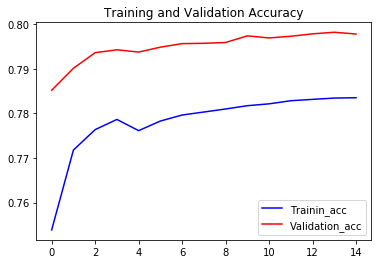

In [40]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

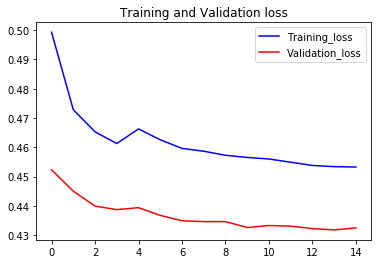

In [41]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

**Preprocessing of tweets given by user**

In [42]:
def preprocess(text):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',text)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    print(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=300)
    return review

**Prediction**

In [43]:
def prediction(review):
    review=preprocess(review)
    score=model.predict(review)
    score=score[0]
    if score<0.4:
        print("Negative")
    elif score>0.4 and score<0.6:
        print("Neutral")
    else:
        print("Positive")
    print(score)


In [44]:
prediction("the food is not bad")

['food', 'not', 'bad']
Positive
[0.6586988]


In [45]:
prediction("the film was horrible")

['film', 'horrible']
Negative
[0.03846683]


In [46]:
scores = model.predict(X_test, verbose=1, batch_size=1024)

320000/320000 [==============================] - 47s 145us/step


In [47]:
scores

array([[0.00563517],
       [0.6874652 ],
       [0.8231057 ],
       ...,
       [0.9437214 ],
       [0.91557   ],
       [0.9682863 ]], dtype=float32)

In [48]:
y_pred=np.where(scores>0.5,1,0)

In [49]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [50]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

**Evaluation Using Confusion Matrix, accuracy_score and classification report**

In [51]:

cm=confusion_matrix(y_pred,y_test)
print(cm)

[[124101  28950]
 [ 35945 131004]]


In [52]:
print(accuracy_score(y_pred,y_test))

0.797203125


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    160046
           1       0.78      0.82      0.80    159954

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



**Saving the Trained Models**

In [54]:
joblib.dump(w2v_model,'word2vec.pkl')
joblib.dump(tokenizer,'tokenizer.pkl')
joblib.dump(model,'final_model.pkl')

['final_model.pkl']